In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [28]:
data = pd.read_csv("cw1a.csv", comment="#")
base_current = data['Ib (A)']
base_emiter_voltage = data['Vbe (V)']

thermal_voltage = 0.026


In [29]:
def Ib(ube, i_s, eta):
    return i_s*(np.exp(ube/(eta*thermal_voltage)) - 1)

In [30]:
popt, pcov = curve_fit(Ib, xdata = base_emiter_voltage, ydata = base_current, p0=[1, 1.5])
i_s, eta = popt
i_s, eta

(2.4364332058948277e-15, 1.1794564652481272)

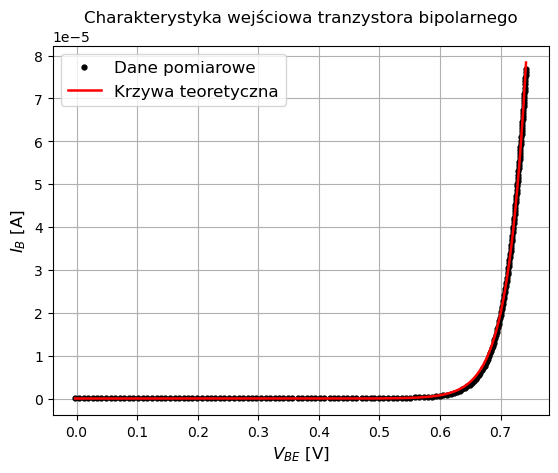

In [31]:
plt.plot(base_emiter_voltage, base_current, marker = 'o', color = 'black', markersize = 3.5, label = 'Dane pomiarowe', linestyle = ' ')
plt.plot(base_emiter_voltage, Ib(base_emiter_voltage, popt[0], popt[1]), color = 'red', linewidth = 1.8, label = 'Krzywa teoretyczna')
plt.ylabel(r"$I_{B}$ [A]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Charakterystyka wejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [32]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current = data['Ic (A)']
beta = (collector_current[len(collector_current) - 1] - collector_current[0])/((base_current[len(base_current) - 1] - base_current[0]))
gm = abs(collector_current/thermal_voltage)

In [33]:
import matplotlib.ticker as ticker
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))  # Ustawienia dla notacji naukowej

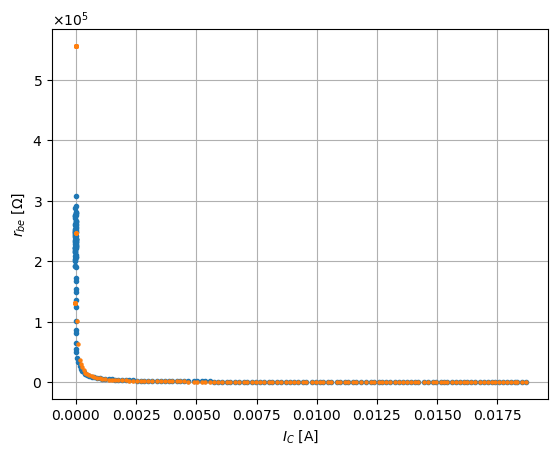

In [34]:
plt.plot(collector_current, (eta*thermal_voltage)/base_current, marker = 'o', linestyle = '', markersize = 3)
plt.plot(collector_current, beta/gm, marker = 'o', linestyle = '', markersize = 2.2)
plt.grid()
plt.xlabel(r"$I_{C}$ [A]")
plt.ylabel(r"$r_{be}$ [$\Omega$]")
plt.gca().yaxis.set_major_formatter(formatter)  

In [35]:
data = pd.read_csv("cw1b.csv", comment="#")
collector_current = data['Ic (A)']
base_emiter_voltage = data['Vbe (V)']

In [36]:
def Ic(Ube, beta, Is, eta):
    return beta*Is*(np.exp(Ube/(eta*0.026)) - 1)

In [68]:
popt, _ = curve_fit(Ic, xdata = base_emiter_voltage, ydata = collector_current, p0=[120, 2e-15, 1.15])
beta, saturation_current, ideality_factor = popt
popt, pcov

(array([2.63113746e+02, 4.37657635e-15, 1.20758981e+00]),
 array([[2.82040333e-32, 5.72612486e-19],
        [5.72612486e-19, 1.16280411e-05]]))

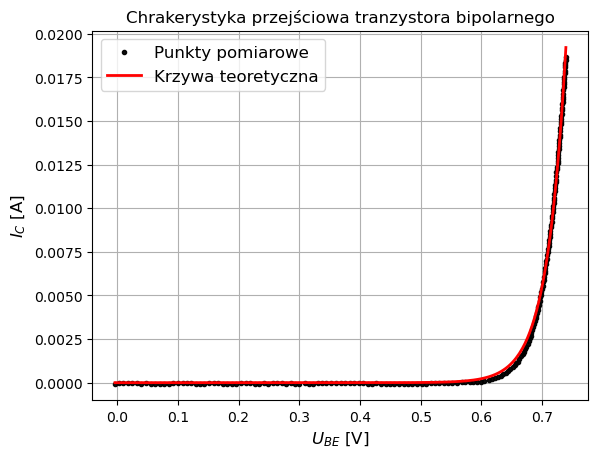

In [60]:
plt.plot(base_emiter_voltage, collector_current, color = 'black', linestyle = '', marker = 'o', markersize = 3, label = 'Punkty pomiarowe', alpha = 0.95)
plt.plot(base_emiter_voltage, Ic(base_emiter_voltage, beta, saturation_current, ideality_factor), color = 'red', linewidth = 2, label = 'Krzywa teoretyczna')
plt.xlabel(r"$U_{BE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Chrakerystyka przejściowa tranzystora bipolarnego")
plt.legend(fontsize = 12)
plt.grid()

In [39]:
def gm(Ube):
    return ((beta*saturation_current)/(eta * thermal_voltage))*np.exp(Ube/(eta*thermal_voltage))

In [48]:
beta_lowsignal = (collector_current[len(collector_current) - 1] - collector_current[0])/(base_current[len(base_current) - 1] - base_current[0])

gm_lowsignal = collector_current/thermal_voltage
beta_lowsignal

243.85962401071637

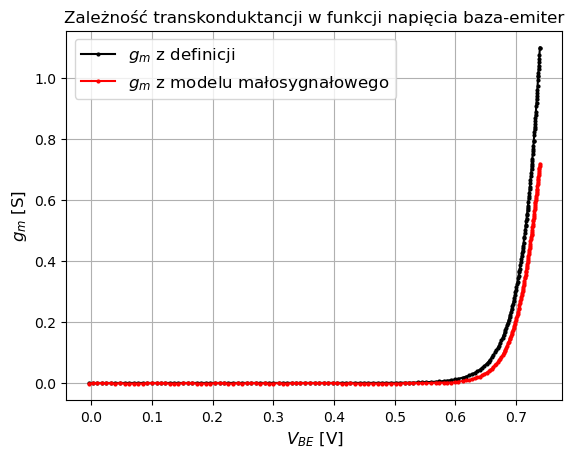

In [41]:
plt.plot(base_emiter_voltage, gm(base_emiter_voltage), color = 'black', label = r'$g_{m}$ z definicji', markersize = 2, marker = 'o')
plt.plot(base_emiter_voltage, gm_lowsignal, color = 'red', label = r'$g_{m}$ z modelu małosygnałowego', markersize = 2, marker = 'o')
plt.ylabel(r"$g_{m}$ [S]", fontsize = 12)
plt.xlabel(r"$V_{BE}$ [V]", fontsize = 12)
plt.title("Zależność transkonduktancji w funkcji napięcia baza-emiter")
plt.legend(fontsize = 12)
plt.grid()

In [124]:
data = pd.read_csv("cw1c.csv", comment="#")
collector_current = np.array_split(data['Ic (A)'], 6)
collector_emiter_base_voltage = np.array_split(data['Vce (V)'], 6)
vbe_lables = ["600 mV", "800 mV", "1000 mV", "1200 mV", "1400 mV", "1600 mV"]

f:\Anaconda\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


Text(0.5, 1.0, 'Charakterystyka wyjściowa tranzystora bipolarnego')

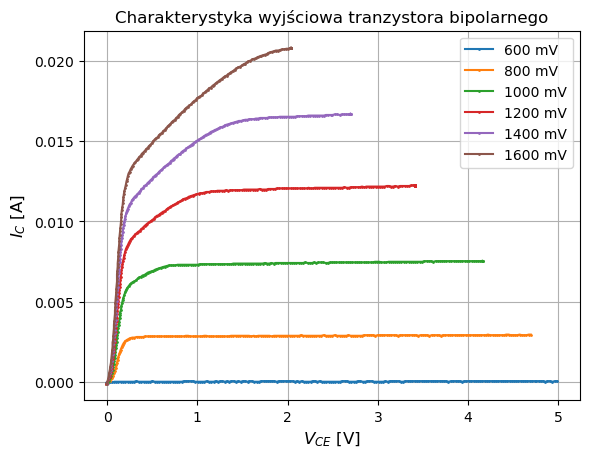

In [117]:
for i in range(0, 6):
    plt.plot(collector_emiter_base_voltage[i], collector_current[i], marker = 'o', markersize = 1, label = vbe_lables[i])
plt.grid()
plt.legend()
plt.xlabel(r"$V_{CE}$ [V]", fontsize = 12)
plt.ylabel(r"$I_{C}$ [A]", fontsize = 12)
plt.title("Charakterystyka wyjściowa tranzystora bipolarnego")

In [135]:
from scipy.stats import linregress
np.where(data['Vrc (V)'] == 0.55)

(array([  22,  223,  424,  625,  826, 1027], dtype=int64),)

In [147]:
fit = linregress(data['Vce (V)'][230:401], data['Ic (A)'][230:401])
fit

LinregressResult(slope=2.2005793966912967e-05, intercept=0.00283779789247192, rvalue=0.8904986299407297, pvalue=1.0932405171475046e-59, stderr=8.648850587254852e-07, intercept_stderr=2.4481841541701893e-06)

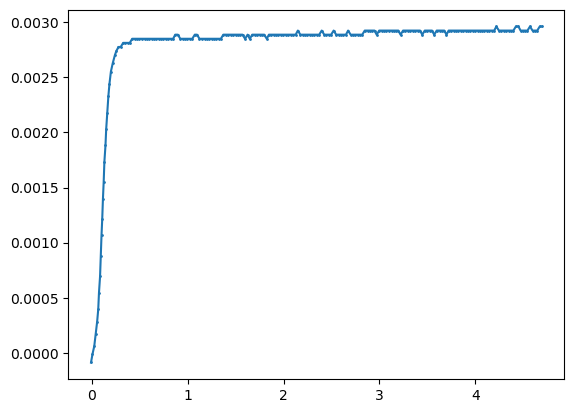

In [ ]:
plt.plot(collector_emiter_base_voltage[2], collector_current[2], marker = 'o', markersize = 1, label = vbe_lables[2])
